In [6]:
import nglview as nv
import pytraj as pt
import warnings
warnings.filterwarnings("ignore")

# use pytraj to read coorindates
traj = pt.datafiles.load_tz2()
data = pt.distance(traj, ':13 :1')
print(data)
pdb_fn = 'test.pdb'

# save a single pdb file to load to ngview's Structure
traj[:1].save(pdb_fn)
struct = nv.load_file(pdb_fn)

# create nglview.Trajectory from pytraj's Trajectory
ntraj = nv.Trajectory(xyz=traj.xyz, topology=struct)
ntraj.n_frames

view = nv.TrajectoryViewer(ntraj)
view.clip = { "near": 0, "far": 100, "dist": 10 }
view.representations = [ { "type": "licorice" } ]

[ 22.71949743  20.6334974   20.3974632  ...,  14.20844595  13.90795988
  15.64770771]


In [9]:
%matplotlib notebook
from matplotlib.widgets import AxesWidget
import numpy as np
import matplotlib.pyplot as plt

import nglview

# adapted from: https://gist.github.com/arose/ce0fdf44bd508f6fc216
    
def trajectoryFigureExample(ngl_widget, data):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_xlabel('frame number')
    ax.set_ylabel('End to end distance (Angstrom)')

    #data = pt.radgyr(traj)

    x, y = range(len(data)), data
    
    ax.plot(x, y, 'o')
    ax.set_xlim(0, 150)
    ax.set_ylim(0, 40)
    lineh = ax.axhline(ax.get_ybound()[0], c="green")
    linev = ax.axvline(ax.get_xbound()[0], c="green")
    dot, = ax.plot([],[], 'o', c='red', ms=10)

    ngl_widget.isClick = False

    
    def onclick(event):
        linev.set_xdata((event.xdata, event.xdata))
        lineh.set_ydata((event.ydata, event.ydata))
        ngl_widget.isClick = True
        ngl_widget.frame = index

    def frame_changed( self ):
        nglview.TrajectoryViewer._frame_changed( ngl_widget )
        if ngl_widget.isClick is True:
            ngl_widget.isClick = False
        else:
            dot.set_xdata((x[ngl_widget.frame]))
            dot.set_ydata((y[ngl_widget.frame]))
            linev.set_xdata(ax.get_ybound()[0])
            lineh.set_ydata(ax.get_xbound()[0])
            
    ngl_widget._frame_changed = frame_changed
        
    axes_widget = AxesWidget(ax)
    axes_widget.connect_event('button_release_event', onclick)

<IPython.core.display.Javascript object>


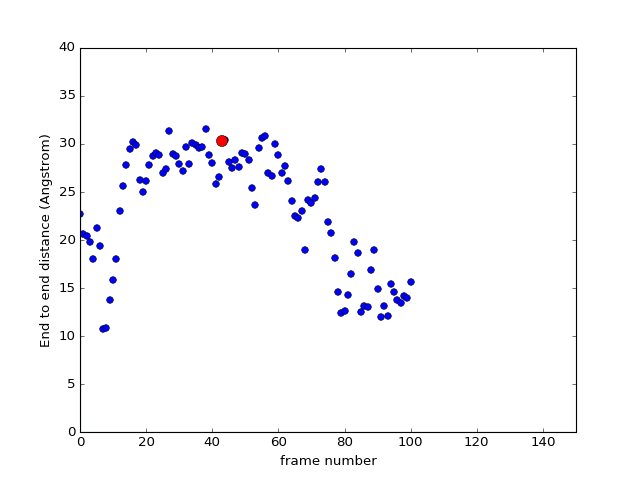

In [10]:
trajectoryFigureExample(view, data)

In [12]:
view